# <font face = 'Impact' color = '#FFAEBC' > Getting Ready with our Second Mini-Project <font/>
#### <font face = 'Times New Roman' color = '#A16AE8'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
In this notebook, we will be importing packages and use them to load and explore data sets. We will be using the pandas package to load datasets and qdesc to explore both categorical and numerical variables. Functions to be used include pd.read_excel, pd.read_csv, head, qd.desc, qd.normcheck_dashboard, qd.freqdist_a, and qd.freqdist_to_excel.

# <font face = 'Impact' color = '#FFAEBC' > Exploring Sleep Hours during Weeknights <font/>

**Submitted by**: Arabella Trixie C. Sabisol

**Year Level and Section**: BSIS 4A

**Date**: September 17, 2025

In [ ]:
# Importing the necessary packages for us to use certain functions.
%pip install qdesc
import pandas as pd
import numpy as np
import qdesc as qd

In [ ]:
# Loading a data set (SleepData.xlsx) and storing it into a variable.
df = pd.read_excel('SleepData.xlsx')

In [ ]:
# Check the first 5 rows of the dataframe
df.head(5)

,Sex,Age,MaritalStatus,Employment,sleep(hrs)/weeknights
0,Male,30,Single,Permanent,8.85
1,Female,58,Married,Permanent,8.76
2,Female,60,Single,Permanent,8.49
3,Male,43,Single,Permanent,8.85
4,Female,43,Single,Permanent,8.73


In [ ]:
# Check the information of the dataframe
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    671 non-null    object 
 1   Age                    671 non-null    int64  
 2   MaritalStatus          671 non-null    object 
 3   Employment             671 non-null    object 
 4   sleep(hrs)/weeknights  671 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 26.3+ KB
None


In [ ]:
# Using the desc function from the qdesc package to perform descriptive analysis.
qd.desc (df)

,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
Age,671.0,49.80,19.36,49.00,17.00,18.00,84.00,7.38,0.78
sleep(hrs)/weeknights,671.0,7.63,1.39,8.34,0.98,4.52,9.88,35.70,0.78


The descriptive analysis shows that the average age of participants is about 50 years, but ages are widely spread (18–84 years), and the distribution is not normal (AD test rejects normality).

For sleep hours, participants sleep an average of about 7.6 hours per weeknight, with a median of 8.3 hours. Most people’s sleep is within 1.4 hours of the mean, ranging from 4.5 to nearly 10 hours. The Anderson-Darling test suggests sleep hours are not normally distributed.

In [ ]:
# Generate descriptive analysis for sleep hours when grouped by sex.
qd.grp_desc(df, 'sleep(hrs)/weeknights', 'Sex')

,Sex,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,Female,350,7.67,1.36,8.33,0.96,4.52,9.88,17.14,0.78
1,Male,321,7.57,1.43,8.36,0.99,4.66,9.64,18.70,0.78


*For females (n=350), the average sleep on weeknights is 7.67 hours (SD = 1.36) with a median of 8.33 hours, ranging from 4.52 to 9.88 hours. For males (n=321), the mean is slightly lower at 7.57 hours (SD = 1.43) with a median of 8.36 hours, and a range from 4.66 to 9.64 hours. Overall, both sexes show very similar sleep patterns, with only minor differences in averages and variability. However, the Anderson–Darling statistics (17.14 for females, 18.70 for males, both greater than 0.78) indicate that sleep hours are not normally distributed in either group.*

In [ ]:
# Generate descriptive analysis for sleep hours when grouped by employment.
qd.grp_desc(df, 'sleep(hrs)/weeknights', 'Employment')

,Employment,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,Permanent,352,8.87,0.32,8.86,0.22,7.96,9.88,0.15,0.78
1,Probationary,319,6.26,0.60,6.22,0.40,4.52,7.90,0.36,0.78


*Employees with permanent status (n=352) report an average of 8.87 hours of sleep on weeknights (SD = 0.32), with a median of 8.86 hours and values ranging from 7.96 to 9.88 hours. In contrast, probationary employees (n=319) average only 6.26 hours (SD = 0.60), with a median of 6.22 hours and a range from 4.52 to 7.90 hours. This shows a clear difference, where permanent employees sleep longer and exhibit less variability compared to probationary employees. The Anderson–Darling test statistics (0.15 for permanent, 0.36 for probationary, both below 0.78) suggest that sleep hours in both groups follow a normal distribution.*

In [ ]:
# Generate descriptive analysis for sleep hours when grouped by marital status.
qd.grp_desc(df, 'sleep(hrs)/weeknights', 'MaritalStatus')

,MaritalStatus,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,Married,333,7.67,1.40,8.44,0.88,4.66,9.64,19.32,0.78
1,Single,338,7.58,1.39,8.26,1.01,4.52,9.88,16.56,0.78


*Married participants (n=333) reported an average of 7.67 hours of sleep on weeknights (SD = 1.40), with a median of 8.44 hours and a range from 4.66 to 9.64 hours. Similarly, single participants (n=338) averaged 7.58 hours (SD = 1.39), with a median of 8.26 hours and values ranging from 4.52 to 9.88 hours. The results indicate that sleep duration is comparable across marital status groups, though married individuals show a slightly higher central tendency. However, the Anderson–Darling statistics (19.32 for married and 16.56 for single, both above 0.78) confirm that sleep hours in both groups deviate significantly from normality.*


--- Variable: Age ---
  Anderson-Darling Statistic : 7.3813
  Critical Value (@ 5.0%) : 0.7820
  Decision : Reject Null


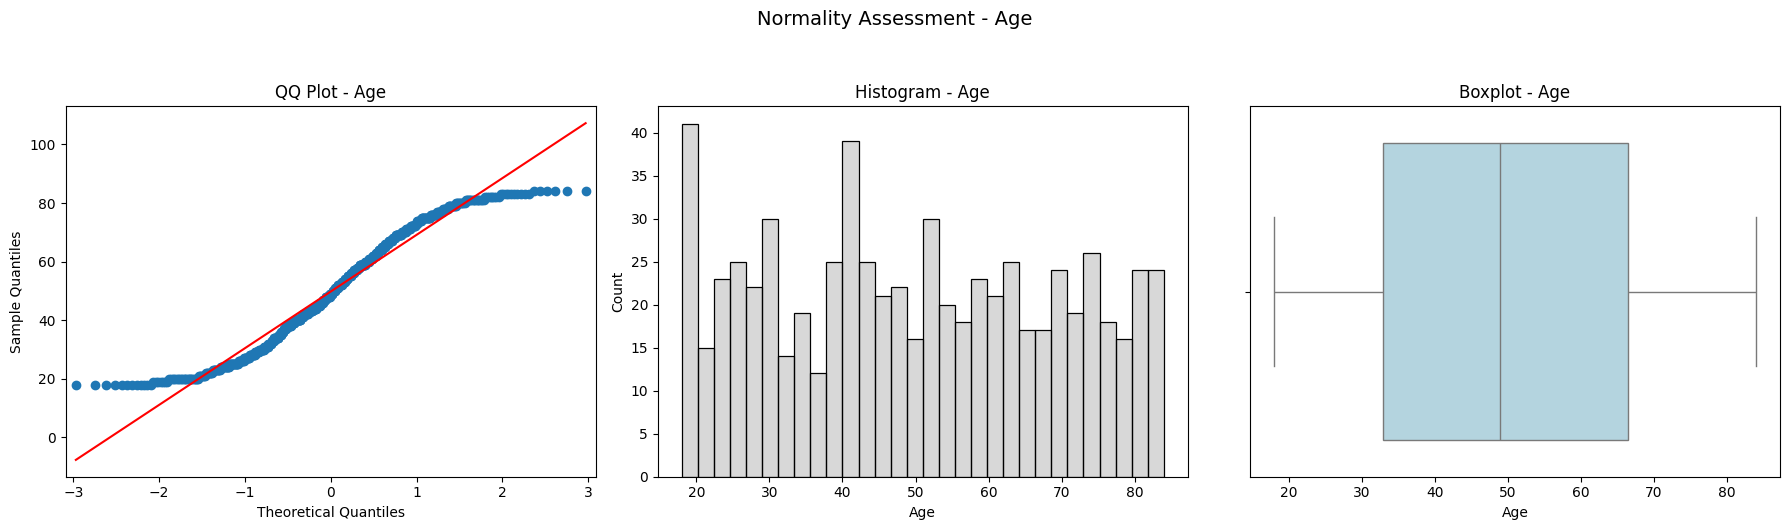


--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 35.6977
  Critical Value (@ 5.0%) : 0.7820
  Decision : Reject Null


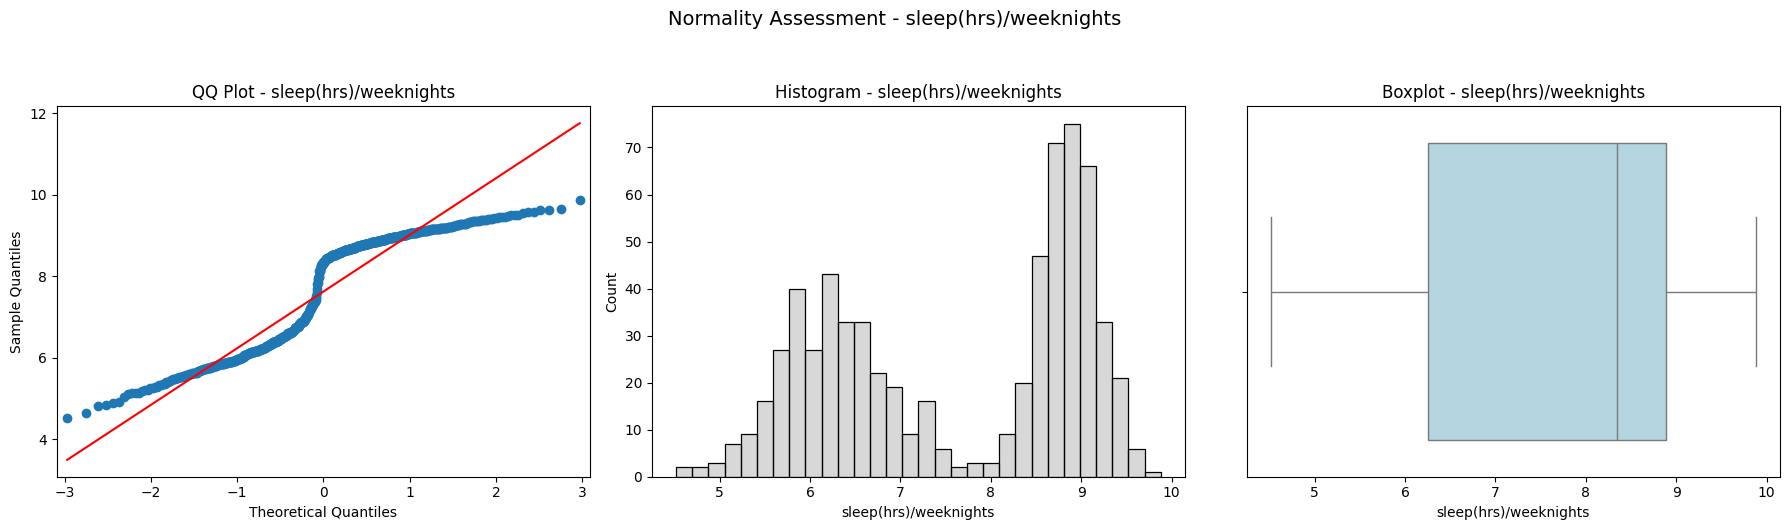

In [ ]:
# Use the desc function from the qdesc package to explore the data for assumption of normality.
qd.normcheck_dashboard(df)

For Age, the Anderson–Darling statistic (7.38 > 0.78) rejects the null hypothesis of normality. The Q-Q plot shows systematic deviations from the diagonal, the histogram is uneven rather than bell-shaped, and the boxplot indicates variability across a wide range.

For Sleep Hours (Weeknights), the test result (35.70 > 0.78) also rejects normality. The Q-Q plot shows strong departures from the line, the histogram has two peaks (bimodal distribution), and the boxplot suggests mild skewness.

Both Age and Sleep Hours (Weeknights) are not normally distributed, as confirmed by both statistical testing and visual inspection.

In [ ]:
# Slicing the data frame to only include the single.
single = df[df['MaritalStatus'] == 'Single']
single.head()

,Sex,Age,MaritalStatus,Employment,sleep(hrs)/weeknights
0,Male,30,Single,Permanent,8.85
2,Female,60,Single,Permanent,8.49
3,Male,43,Single,Permanent,8.85
4,Female,43,Single,Permanent,8.73
6,Male,45,Single,Permanent,8.36


*The sliced dataframe filters the data to include only individuals marked as Single, presenting their sex, age, employment status, and reported sleep hours on weeknights.*

In [ ]:
# Confirm that the subset would only include those who are single.
np.unique(single.MaritalStatus)

array(['Single'], dtype=object)


--- Variable: Age ---
  Anderson-Darling Statistic : 3.0459
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


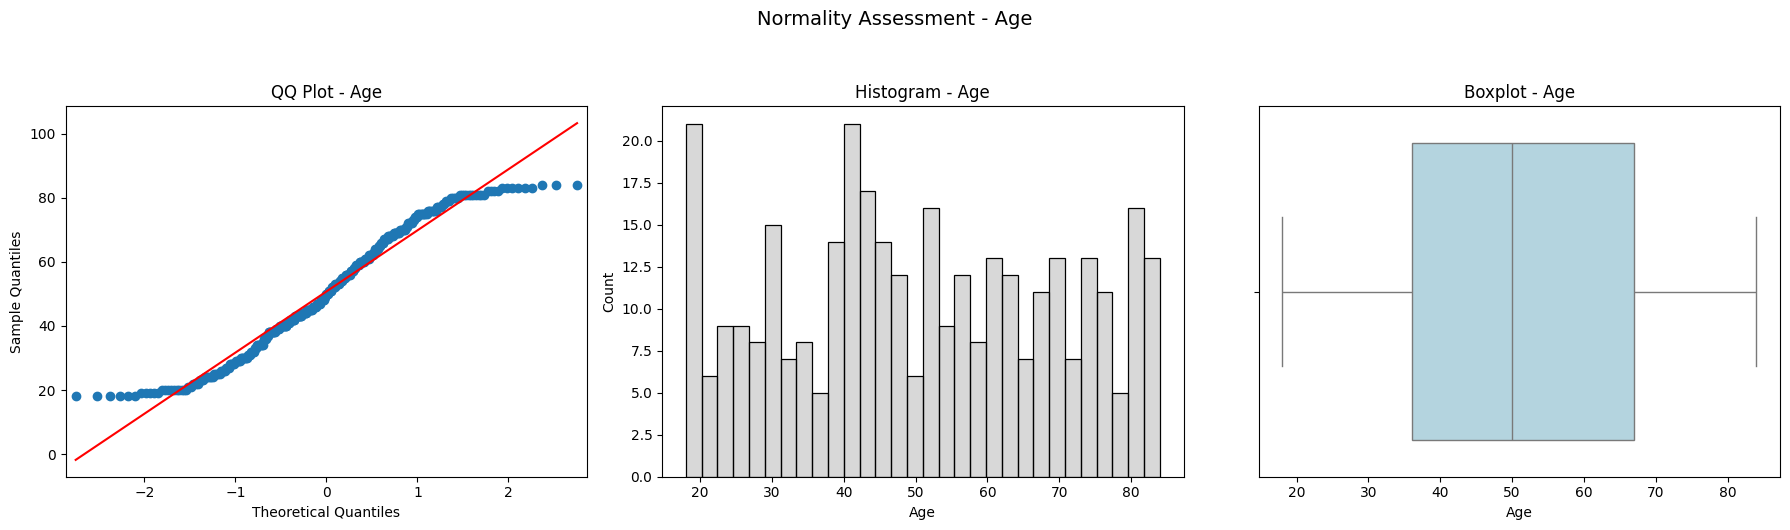


--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 16.5637
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


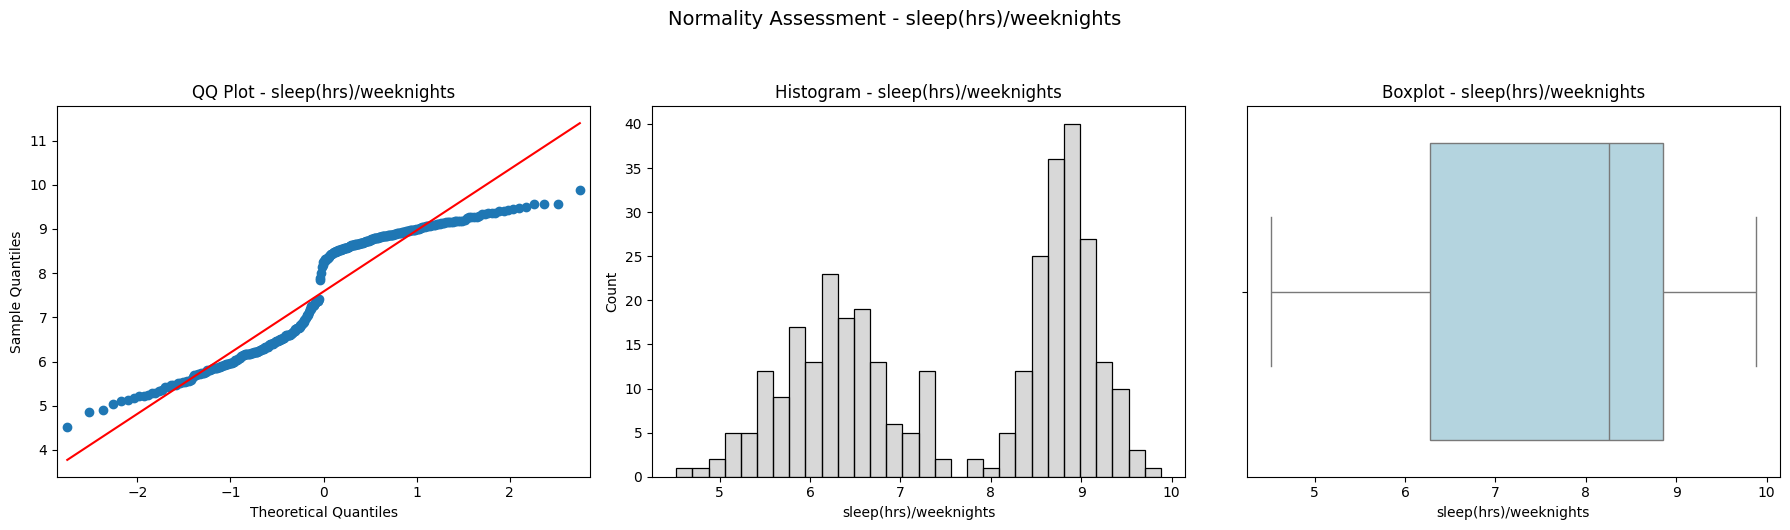

In [ ]:
# Use the qdesc package to explore the data (only those who are Single) for assumption of normality.
qd.normcheck_dashboard(single)

For Age, the Anderson–Darling test (7.38 > 0.78) shows it is not normally distributed. The Q-Q plot deviates from the diagonal, the histogram is irregular, and the boxplot lacks symmetry.

For Sleep Hours (Weeknights), the test result (35.70 > 0.78) also indicates non-normality. The Q-Q plot shows clear deviations, the histogram has multiple peaks, and the boxplot suggests slight skewness.

In [ ]:
# Slicing the data frame to only include the married.
married = df[df['MaritalStatus'] == 'Married']
married.head()

,Sex,Age,MaritalStatus,Employment,sleep(hrs)/weeknights
1,Female,58,Married,Permanent,8.76
5,Female,32,Married,Permanent,8.70
10,Female,29,Married,Permanent,9.05
11,Female,31,Married,Permanent,9.41
12,Male,38,Married,Permanent,8.94


*The sliced dataframe filters the data to include only respondents whose MaritalStatus is Married, showing their sex, age, employment type, and sleep hours on weeknights.*

In [ ]:
# Confirm that the subset is all married.
np.unique(married.MaritalStatus)

array(['Married'], dtype=object)


--- Variable: Age ---
  Anderson-Darling Statistic : 4.7098
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


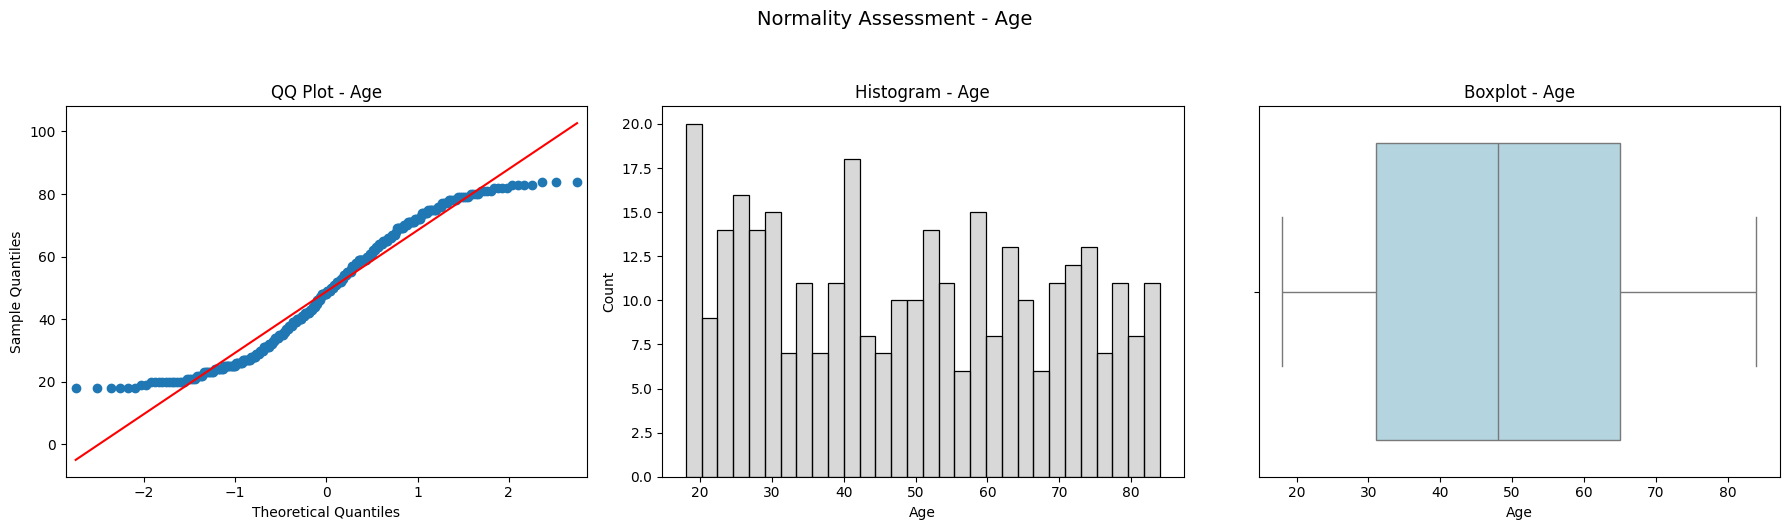


--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 19.3198
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


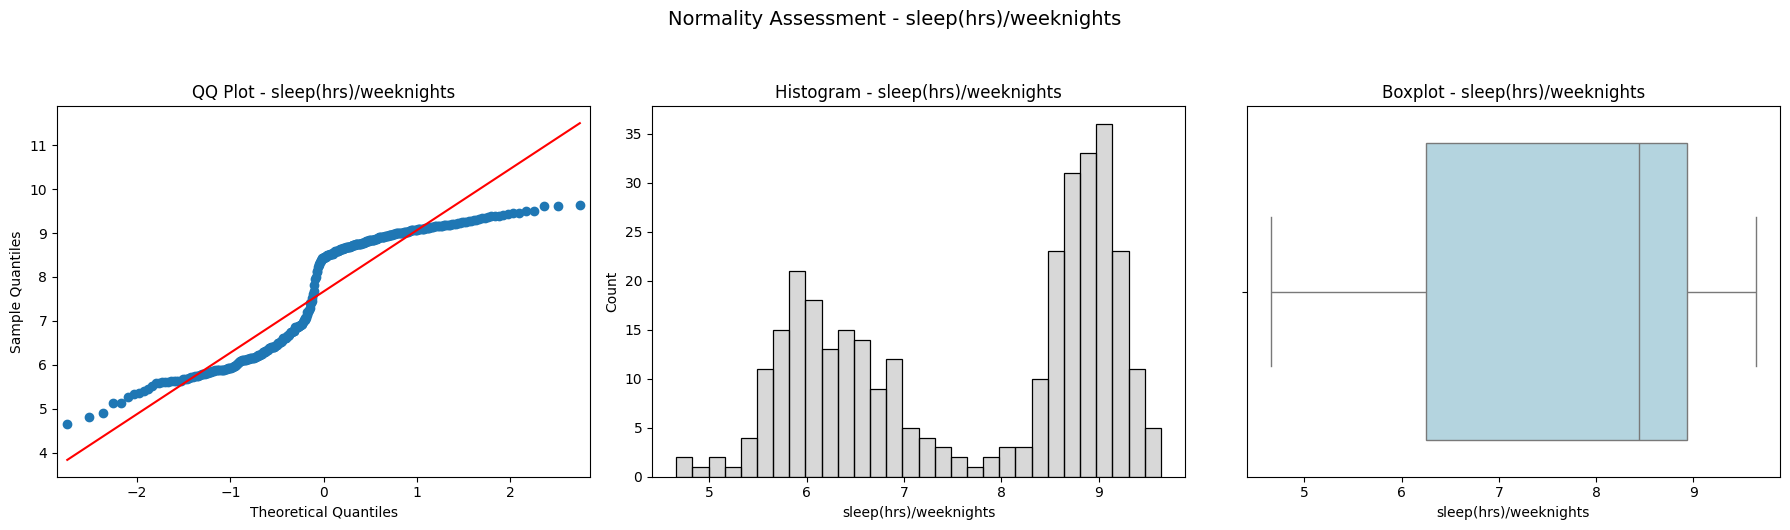

In [ ]:
# Use the qdesc package to explore the data for assumption of normality.
qd.normcheck_dashboard(married)

For Age, the Anderson–Darling statistic (4.71 > 0.78) leads us to reject normality. The Q-Q plot shows tail deviations, the histogram is uneven, and the boxplot indicates a wide spread.

For Sleep Hours (Weeknights), the statistic (19.32 > 0.78) also indicates non-normality. The Q-Q plot departs from the diagonal, the histogram shows clustering around 7–9 hours, and the boxplot suggests slight skewness.

In the Married subgroup, both Age and Sleep Hours are not normally distributed, consistent with the overall data.

In [ ]:
# Generate a frequency distribution for a specified variable: Sex
qd.freqdist(df, 'Sex')

,Sex,Count,Percentage
0,Female,350,52.16
1,Male,321,47.84


*Among the 671 respondents, 52.16% (350) are female and 47.84% (321) are male. This shows that the dataset has a nearly even distribution of sex, with females making up a slightly larger share.*

In [ ]:
# Generate a frequency distribution for a specified variable: Employment
qd.freqdist(df, 'Employment')

,Employment,Count,Percentage
0,Permanent,352,52.46
1,Probationary,319,47.54


In [ ]:
# Generate a frequency distribution for a specified variable: Marital Status
qd.freqdist(df, 'MaritalStatus')

,MaritalStatus,Count,Percentage
0,Single,338,50.37
1,Married,333,49.63


*The frequency distribution of Marital Status shows that 338 respondents (50.37%) are single and 333 respondents (49.63%) are married. This indicates that the dataset is almost evenly split between single and married participants.*

In [ ]:
# Generate frequency distribution for all the categorical features from the said data frame.
qd.freqdist_a(df)

,Column,Value,Count,Percentage
0,Sex,Female,350,52.16
1,Sex,Male,321,47.84
2,MaritalStatus,Single,338,50.37
3,MaritalStatus,Married,333,49.63
4,Employment,Permanent,352,52.46
5,Employment,Probationary,319,47.54


*The frequency distribution across all categorical variables shows that the dataset is fairly balanced. By sex, 52.16% are female (350) and 47.84% are male (321). For marital status, 50.37% are single (338) and 49.63% are married (333). In terms of employment, 52.46% are permanent (352) while 47.54% are probationary (319). These results indicate that the dataset is evenly distributed across sex, marital status, and employment groups, with no category strongly dominating the others.*

In [ ]:
# Generating a frequency distribution but this time have it stored in an excel file and organized
# on a per sheet basis per categorical feature.